In [2]:
%matplotlib inline

import xarray as xr
import intake

# util.py is in the local directory
# it contains code that is common across project notebooks
# or routines that are too extensive and might otherwise clutter
# the notebook design
import util 

/srv/conda/envs/notebook/lib/python3.7/site-packages/intake/source/discovery.py:136: FutureWarning: The drivers ['stac-catalog', 'stac-collection', 'stac-item'] do not specify entry_points and were only discovered via a package scan. This may break in a future release of intake. The packages should be updated.
  FutureWarning)


In [3]:
if util.is_ncar_host():
    col = intake.open_esm_datastore("../catalogs/glade-cmip6.json")
else:
    col = intake.open_esm_datastore("../catalogs/pangeo-cmip6.json")
col

pangeo-cmip6-ESM Collection with 28691 entries:
	> 10 activity_id(s)

	> 23 institution_id(s)

	> 48 source_id(s)

	> 29 experiment_id(s)

	> 86 member_id(s)

	> 23 table_id(s)

	> 190 variable_id(s)

	> 7 grid_label(s)

	> 28691 zstore(s)

	> 59 dcpp_init_year(s)

In [4]:
col.df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
0,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,pr,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
1,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,prsn,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
2,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tas,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
3,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tasmax,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
4,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tasmin,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN


In [5]:
import pprint 
uni_dict = col.unique(['source_id', 'experiment_id', 'table_id','variable_id'])
pprint.pprint(uni_dict, compact=True)

{'experiment_id': {'count': 29,
                   'values': ['ssp370', 'esm-ssp585', '1pctCO2-bgc', 'hist-bgc',
                              '1pctCO2', 'abrupt-4xCO2', 'historical',
                              'piControl', 'amip', 'esm-hist', 'esm-piControl',
                              'hist-GHG', 'hist-aer', 'hist-nat', 'dcppA-assim',
                              'dcppA-hindcast', 'dcppC-hindcast-noAgung',
                              'dcppC-hindcast-noElChichon',
                              'dcppC-hindcast-noPinatubo', 'highresSST-present',
                              'control-1950', 'hist-1950', 'deforest-globe',
                              'esm-ssp585-ssp126Lu', 'omip1', 'lgm', 'ssp126',
                              'ssp245', 'ssp585']},
 'source_id': {'count': 48,
               'values': ['BCC-ESM1', 'BCC-CSM2-MR', 'CanESM5', 'CNRM-ESM2-1',
                          'UKESM1-0-LL', 'GISS-E2-1-G', 'CESM2', 'GFDL-ESM4',
                          'AWI-CM-1-1-MR', 'CAM

In [6]:
cat = col.search(source_id=['GFDL-CM4'],experiment_id=['piControl'], 
                 table_id='Omon', variable_id=['uo','vo','thetao'], grid_label=['gn'])
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
16635,CMIP,NOAA-GFDL,GFDL-CM4,piControl,r1i1p1f1,Omon,thetao,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/piControl/r...,NaN
16637,CMIP,NOAA-GFDL,GFDL-CM4,piControl,r1i1p1f1,Omon,uo,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/piControl/r...,NaN
16638,CMIP,NOAA-GFDL,GFDL-CM4,piControl,r1i1p1f1,Omon,vo,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/piControl/r...,NaN


In [7]:
dset_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True, 'decode_times': False}, 
                                cdf_kwargs={'chunks': {}, 'decode_times': False})

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 1 group(s)


In [8]:
dset_dict

{'CMIP.NOAA-GFDL.GFDL-CM4.piControl.Omon.gn': <xarray.Dataset>
 Dimensions:    (bnds: 2, lev: 35, member_id: 1, time: 6000, vertex: 4, x: 1440, y: 1080)
 Coordinates:
   * y          (y) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
   * bnds       (bnds) float64 1.0 2.0
   * x          (x) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
   * time       (time) int64 0 708 1416 2148 ... 4377060 4377792 4378524 4379256
   * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
   * member_id  (member_id) <U8 'r1i1p1f1'
 Dimensions without coordinates: vertex
 Data variables:
     lat_bnds   (y, x, vertex) float32 dask.array<chunksize=(1080, 1440, 4), meta=np.ndarray>
     lev_bnds   (lev, bnds) float64 dask.array<chunksize=(35, 2), meta=np.ndarray>
     lon_bnds   (y, x, vertex) float32 dask.array<chunksize=(1080, 1440, 4), meta=np.ndarray>
     lat        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
     lon        (y, x)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
dset_dict.keys()

dict_keys(['CMIP.NOAA-GFDL.GFDL-CM4.piControl.Omon.gn'])

In [11]:
ds = dset_dict['CMIP.NOAA-GFDL.GFDL-CM4.piControl.Omon.gn']

In [13]:
ds.uo
ds.thetao
#ds.so

<xarray.DataArray 'thetao' (member_id: 1, time: 6000, lev: 35, y: 1080, x: 1440)>
dask.array<transpose, shape=(1, 6000, 35, 1080, 1440), dtype=float32, chunksize=(1, 1, 35, 1080, 1440), chunktype=numpy.ndarray>
Coordinates:
  * y          (y) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * x          (x) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * time       (time) int64 0 708 1416 2148 ... 4377060 4377792 4378524 4379256
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * member_id  (member_id) <U8 'r1i1p1f1'
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    long_name:      Sea Water Potential Temperature
    original_name:  thetao
    standard_name:  sea_water_potential_temperature
    units:          degC

In [145]:
#data_sub = ds.isel(time=100,x=slice(890,1040),y=slice(630,780)).isel(lev=9).isel(member_id=-1)

In [14]:
data_subtime = ds.isel(time=slice(5880,6000),x=slice(890,1040),y=slice(630,780)).isel(lev=9).isel(member_id=-1)
#data_subtime['uuo'] = (data_subtime.uo * data_subtime.uo)
#data_subtime['vvo'] = (data_subtime.vo * data_subtime.vo)
#data_subtime['TTo'] = (data_subtime.thetao * data_subtime.thetao)
data_subtime['uTo'] = (data_subtime.uo * data_subtime.thetao)
data_subtime['vTo'] = (data_subtime.vo * data_subtime.thetao)
#data_subtime['uvo'] = (data_subtime.uo * data_subtime.vo)
#data_subtime['soso'] = (data_subtime.so * data_subtime.so)
#data_subtime['vso'] = (data_subtime.vo * data_subtime.so)

In [15]:
data_subtime.uTo

<xarray.DataArray 'uTo' (time: 120, y: 150, x: 150)>
dask.array<mul, shape=(120, 150, 150), dtype=float32, chunksize=(1, 150, 150), chunktype=numpy.ndarray>
Coordinates:
  * y          (y) float64 30.24 30.46 30.67 30.89 ... 56.2 56.33 56.47 56.61
  * x          (x) float64 -77.0 -76.75 -76.5 -76.24 ... -39.9 -39.65 -39.4
  * time       (time) int64 4292400 4293108 4293816 ... 4377792 4378524 4379256
    lev        float64 200.0
    member_id  <U8 'r1i1p1f1'

In [22]:
mean_data_sub = data_subtime.mean(dim='time')
anam_data_sub = data_subtime - mean_data_sub
anam100_data_sub = anam_data_sub.mean(dim='time')

/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


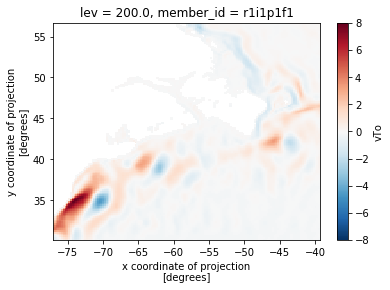

In [17]:
mean_data_sub.vTo.plot() ## MEAN

/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


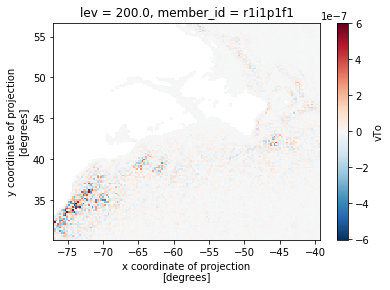

In [23]:
anam100_data_sub.vTo.plot() ## Time-averaged eddy flux

/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


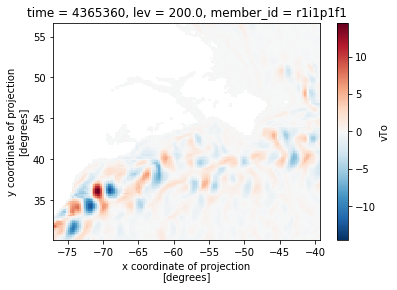

In [21]:
anam100_data_sub.vTo.plot() ## Eddy flux anamoly 

/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


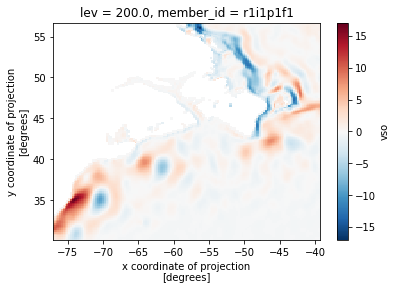

In [123]:
mean_data_sub.vso.plot()

/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


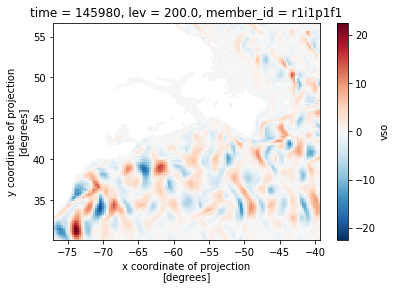

In [124]:
anam100_data_sub.vso.plot()

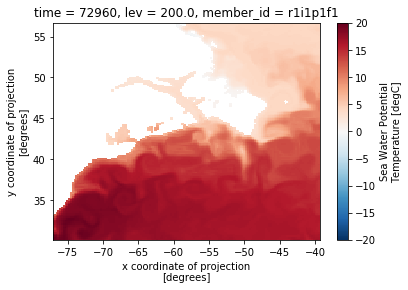

In [22]:
data_sub.thetao.plot()

In [23]:
data_sub['ke']=(('y','x'),0.5*(data_sub.uo**2 + data_sub.vo**2))

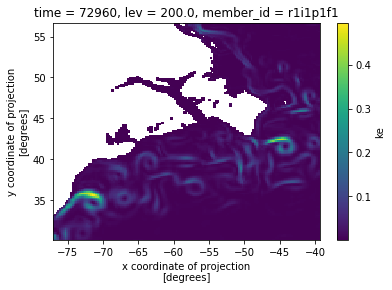

In [24]:
data_sub.ke.plot()

In [25]:
data_sub['X'] = data_sub.x*111.32*(10**3) ## deg to meter

In [26]:
data_sub['Y'] = data_sub.y*111.32*(10**3) ## deg to meter

In [27]:
data_sub.X

<xarray.DataArray 'X' (x: 150)>
array([-8572146.19835493, -8543906.30889928, -8515667.87883551,
       -8487430.92143262, -8459195.44987647, -8430961.4772691 ,
       -8402729.01662808, -8374498.08088581, -8346268.68288891,
       -8318040.8353975 , -8289814.55108467, -8261589.84253573,
       -8233366.72224766, -8205145.20262846, -8176925.29599655,
       -8148707.01458013, -8120490.37051664, -8092275.3758521 ,
       -8064062.04254058, -8035850.3824436 , -8007640.40732956,
       -7979432.12887317, -7951225.55865493, -7923020.70816051,
       -7894817.58878029, -7866616.2118088 , -7838416.58844413,
       -7810218.72978754, -7782022.64684282, -7753828.35051586,
       -7725635.85161414, -7697445.16084624, -7669256.28882136,
       -7641069.24604883, -7612884.04293768, -7584700.68979616,
       -7556519.19683127, -7528339.57414838, -7500161.83175073,
       -7471985.97953903, -7443812.02731107, -7415639.98476301,
       -7387469.86148183, -7359301.66695596, -7331135.41056735,
       -

In [28]:
from numpy import diff
data_sub['dTdy']=(('y:149','x:149'),diff(data_sub.thetao)/diff(data_sub.Y))

In [29]:
data_sub['dTdx']=(('y:149','x:149'),diff(data_sub.thetao)/diff(data_sub.X))

In [30]:
data_sub['dUdx']=(('y:149','x:149'),diff(data_sub.uo)/diff(data_sub.X))

In [31]:
data_sub['dUdy']=(('y:149','x:149'),diff(data_sub.uo)/diff(data_sub.Y))

In [32]:
data_sub['dVdx']=(('y:149','x:149'),diff(data_sub.vo)/diff(data_sub.X))

In [33]:
data_sub['dVdy']=(('y:149','x:149'),diff(data_sub.vo)/diff(data_sub.Y))

In [34]:
data_sub.dTdy

<xarray.DataArray 'dTdy' (y:149: 150, x:149: 149)>
array([[ 4.93073813e-06, -3.08807678e-06, -8.47623377e-06, ...,
         1.43495181e-05,  4.47172573e-06, -4.13969970e-06],
       [ 4.38624918e-07, -6.27118845e-06, -1.98634732e-05, ...,
        -3.69949863e-06, -4.02075065e-06, -2.32649109e-06],
       [-1.34696685e-05, -6.04920159e-06, -3.12788717e-05, ...,
        -7.75096610e-06, -5.23693420e-06, -9.35195966e-07],
       ...,
       [            nan,             nan,             nan, ...,
         3.75457089e-06, -1.23315241e-06, -5.34415454e-06],
       [            nan,             nan,             nan, ...,
         1.63714261e-06,  1.59132521e-06,  8.70118857e-07],
       [            nan,             nan,             nan, ...,
        -2.28033112e-07,  3.31542859e-07,  8.13153079e-07]])
Coordinates:
    time       int64 72960
    lev        float64 200.0
    member_id  <U8 'r1i1p1f1'
Dimensions without coordinates: y:149, x:149

In [35]:
data_sub.dTdx

<xarray.DataArray 'dTdx' (y:149: 150, x:149: 149)>
array([[ 4.19334670e-06, -2.62058875e-06, -7.17744270e-06, ...,
         7.93838539e-06,  2.46506720e-06, -2.27393801e-06],
       [ 3.73028603e-07, -5.32182556e-06, -1.68198452e-05, ...,
        -2.04662245e-06, -2.21646432e-06, -1.27794210e-06],
       [-1.14552808e-05, -5.13344414e-06, -2.64860922e-05, ...,
        -4.28795976e-06, -2.88689323e-06, -5.13703361e-07],
       ...,
       [            nan,             nan,             nan, ...,
         2.07708932e-06, -6.79783093e-07, -2.93554533e-06],
       [            nan,             nan,             nan, ...,
         9.05693758e-07,  8.77228127e-07,  4.77956490e-07],
       [            nan,             nan,             nan, ...,
        -1.26151604e-07,  1.82765106e-07,  4.46665175e-07]])
Coordinates:
    time       int64 72960
    lev        float64 200.0
    member_id  <U8 'r1i1p1f1'
Dimensions without coordinates: y:149, x:149

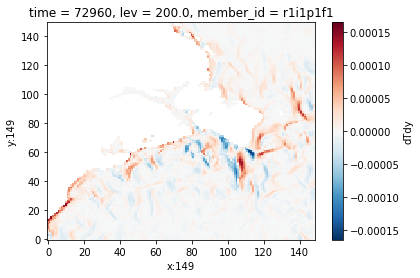

In [36]:
data_sub.dTdy.plot()

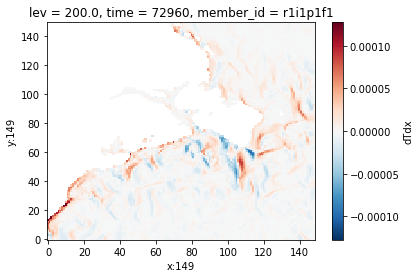

In [37]:
data_sub.dTdx.plot()

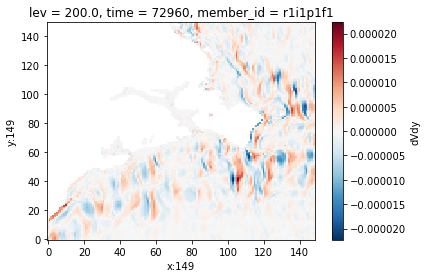

In [42]:
data_sub.dVdy.plot()

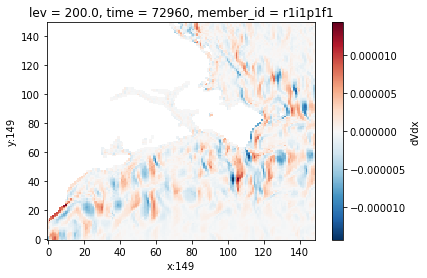

In [43]:
data_sub.dVdx.plot()

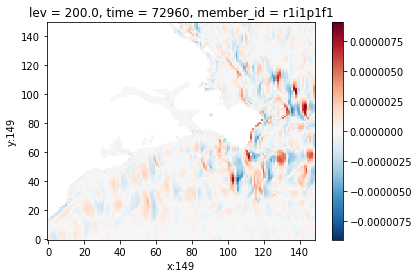

In [44]:
(data_sub.dVdx - data_sub.dVdy).plot()